# 导入小说文件数据

In [1]:
with open('《兽血沸腾》_qinkan.net.txt', 'r', encoding='ANSI') as file:
    comtents = file.read()
del file

# 了解小说文件整体章节布局

In [2]:
import re
# 查找目录中的卷章标题
contents_ol_literary_sxft = re.findall(r'第[一二三四五六七八九十百千零a-z]+[卷章].+', comtents)\
# 找出重复的章节标题
seen = set()
duplicates = set()
for title in contents_ol_literary_sxft:
    if title in seen:
        duplicates.add(title)
    else:
        seen.add(title)
print("重复的章节标题有：")
for dup in duplicates:
    print(dup)

print("总章节数是：" , contents_ol_literary_sxft.__len__())
# 找出目录列表最长的标题并打印字数
longest_title = max(contents_ol_literary_sxft, key=len)
print(f"最长的标题是：\n{longest_title}，\n字数为：{len(longest_title)}")

del seen, duplicates, title, dup, longest_title

重复的章节标题有：
第四百一十七章客似云来
总章节数是： 783
最长的标题是：
第四章？李察发明了第三阕通灵战歌，可以征兆植宠，还可以用命令光环指挥战士的进攻方向，你们这第四阕又是什么用途？”海伦急急问道：“先告诉我，你们知道不知道“通灵之歌”的基础特性？”，
字数为：89


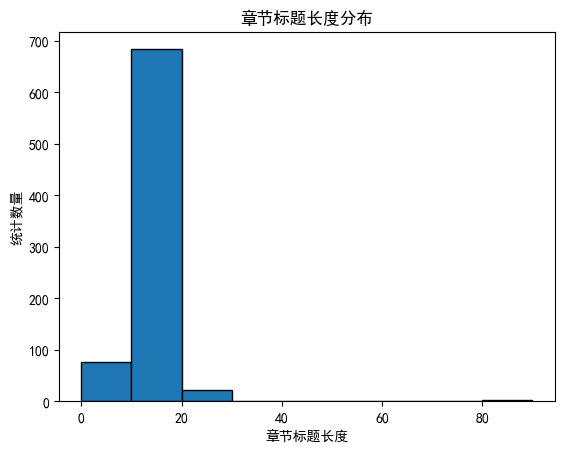

In [3]:
# 统计各章节目录的长度并且划分区间，最后可视化
import matplotlib.pyplot as plt
# 字体设置为中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
chapter_lengths = [len(title) for title in contents_ol_literary_sxft]
def generate_graph(lt_lengths, title='列表元素', step=10):
    '''
    生成列表元素长度的直方图
    :param lt_lengths: 列表元素长度列表
    :param title: 图表主题
    '''
    plt.hist(lt_lengths, bins=range(0, max(lt_lengths) + 10, step), edgecolor='black')
    plt.title(title + '长度分布')
    plt.xlabel(title + '长度')
    plt.ylabel('统计数量')
    plt.show()
generate_graph(chapter_lengths, '章节标题', 10)

In [4]:
def generate_summary(lt_lengths, step=10):
    """
    生成列表元素长度的总结
    :param lt_lengths: 列表元素长度列表
    :return: 列表元素长度总结字典
    """
    summary = {}
    for length in lt_lengths:
        if length not in summary:
            summary[length] = 0
        summary[length] += 1
    # 简单排序
    _summary = {}
    # 划分区间
    for idx in range(0, max(lt_lengths) + 10, step):
        count = 0
        for length in range(idx, idx + step):
            if length in summary:
                count += summary[length]
        _summary[str(idx)+'-'+str(idx+step)] = count
    _summary.pop(str(idx)+'-'+str(idx+step), None)  # 删除最后一个区间（可能没有数据）
    return summary, _summary
list(generate_summary(chapter_lengths))[0]

{9: 46,
 8: 24,
 11: 144,
 7: 6,
 12: 145,
 27: 1,
 6: 1,
 15: 92,
 13: 69,
 14: 64,
 10: 53,
 18: 17,
 17: 35,
 16: 56,
 19: 8,
 21: 1,
 20: 9,
 22: 10,
 82: 1,
 89: 1}

In [9]:
# 给出极端值的索引
extreme_indices = [i for i, length in enumerate(chapter_lengths) if length < 5 or length > 30]
print("极端值的索引有：", extreme_indices)
# 剔除极端数据得到第一次处理的目录数据proc1_contents_ol_literary_sxft等目录数据
proc1_contents_ol_literary_sxft = [title for title in contents_ol_literary_sxft if 5 <= len(title) <= 50]
proc1_contents_ol_literary_sxft.pop(58)
proc1_contents_ol_literary_sxft.pop(9)

del chapter_lengths, contents_ol_literary_sxft, extreme_indices

极端值的索引有： [720, 721]


# 尝试逐卷逐章检查
## 查找分隔符

In [7]:
separators = re.findall(r'[\*]{5,}', comtents)
print(separators)
del separators

['***********', '*****', '*****************************************************************************', '******************************************************************************', '*******************************************************************************', '**********************************************************************', '*************', '**********************************************************************', '******************************************************************', '***********', '***********************************', '****************', '****************************************************************************', '**********************************************************************', '**********', '****************************************************************************', '*********', '**********', '**********************', '********************************', '**********************************', '******************************************',

## 卷章划分并且检查

In [10]:
def split_novel_by_chapters(comtents, content):
    """
    根据章节目录将小说内容拆分为章节列表
    :param comtents: 小说全文内容字符串
    :param content: 章节目录列表
    :return: 章节列表
    """
    chapters = []
    start = 0
    for ct in content:
        index = comtents.find(ct, start)
        if index != -1:
            chapters.append(comtents[start:index].strip())
            start = index + len(ct)
    return chapters

# 分割小说内容为章节列表（迭代多次，已经处理完成）
lt_start_contents = ['书籍信息'] # 添加起始章节标题
lt_special_contents = ['{玩笑篇}'] # 添加特殊章节标题
lt_end_contents = ['大海无量注：本书已于2007-12-6重新整理制作，被全未完章节和删除重复章节。'] # 添加结尾章节标题
sped_novel = split_novel_by_chapters(comtents, proc1_contents_ol_literary_sxft + lt_special_contents +
                                      lt_end_contents)
print("sped_novel长度为：", sped_novel.__len__())
entire_contents_ol_literary_sxft = lt_start_contents + proc1_contents_ol_literary_sxft + lt_special_contents
del lt_start_contents, lt_special_contents, lt_end_contents, proc1_contents_ol_literary_sxft
print("entire_contents_ol_literary_sxft长度为：", entire_contents_ol_literary_sxft.__len__())
# 组合为最终的章节标题和章节内容列表
finished_work = [entire_contents_ol_literary_sxft, sped_novel]
del entire_contents_ol_literary_sxft
# finished_work_t = list(map(list, list(zip(*finished_work))))

sped_novel长度为： 781
entire_contents_ol_literary_sxft长度为： 781


In [11]:
print(sped_novel[-1])
# print(finished_work_t[0])
# print(finished_work_t[0][0])
# print(finished_work_t[0][1])
del sped_novel #, finished_work_t

魔界双月冰冷照耀大地。

红骨祭坛旁，两对魔龙皇族的无头尸身微微蜷曲，琥珀色的血液汇聚在奥术阵图上，氤氲出了强大无伦的元素潮汐运动。

天空蒙上了一层阴翳的色彩，并在巫妖女王的持咒声中，越发变得不详。

“嘉宝！我给了你五滴眼泪怎么动作还是这么慢１这个时候连皮亚琴察上古鳄王都难免失了态：“快一点！再快一点！幻境只能模仿他心中的寄托！一旦被他知晓，这个有美人鱼领域结界的混球就能通过“星空之门”返回现实世界！无论多远的空间都挡不住的１

嘉宝女王的持咒声伴随着猛烈咳出的鲜血猛地拔高。

苍穹之下，只有一串串古老的魔界秘语在回荡：

“那跨越时间和空间的强大存在呵……

时间诺言已经到了兑现的期限……

齐菲亚诺用自己的肉体和灵魂唤醒了您嗜血的心灵……

今天我再次用通往幽密空间的虫洞和高贵血脉的怨灵邀请您莅临这个罪恶的世界……

您是耐奥祖赋予毁灭使命的天使……

您的到来会携带无上的神恩……

大地将在您的威严下颤抖……

空气也会屈服您的意志……

无数的鲜血和生命将为您凋谢……

就像潘多拉蔷薇一样……”

伴随着嘉宝的泣血召唤，淡淡的静电从压抑的云层中一根一根抽出，一个硕大的黑色虫洞在半空中逐渐成形。

“让记载着沧海桑田的世界大声呼唤出您无人知晓的秘名１嘉宝最后一口鲜血喷出，软软歪到在红骨祭坛上，浪潮一样的空气果然回荡起了一个沉闷但又确定的汉语声音。

“刘……狗……剩……”

“嗨１刘震撼从天空中逐渐湮散的黑色虫洞中露出了清纯灿烂的笑脸：“上次也有个家伙是这么叫我的，结果变脑震荡了，是头朝下从树上栽下去的。”

嘉宝和皮亚琴察上古鳄王齐齐晕翻。


## 逐卷逐章检查

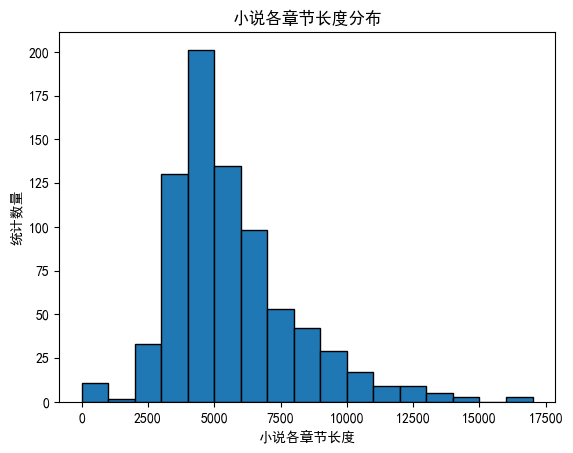

In [12]:
spby_chapter_lengths = [len(title) for title in finished_work[1]]
spby_chapter_lengths_step = 1000
# 生成章节长度分布图
generate_graph(spby_chapter_lengths, '小说各章节', spby_chapter_lengths_step)

In [13]:
# 生成章节长度总结
print(generate_summary(spby_chapter_lengths, spby_chapter_lengths_step)[1])
del spby_chapter_lengths_step
# 找到字数最多的那个章节
idx_max_spby_chapter_lengths = spby_chapter_lengths.index(max(spby_chapter_lengths))
print(f"字数最多的章节是第{idx_max_spby_chapter_lengths + 1}章，标题为：{finished_work[0][idx_max_spby_chapter_lengths]}，字数为：{spby_chapter_lengths[idx_max_spby_chapter_lengths]}，内容为：略")
del idx_max_spby_chapter_lengths

{'0-1000': 11, '1000-2000': 2, '2000-3000': 33, '3000-4000': 130, '4000-5000': 201, '5000-6000': 135, '6000-7000': 98, '7000-8000': 53, '8000-9000': 42, '9000-10000': 29, '10000-11000': 17, '11000-12000': 9, '12000-13000': 9, '13000-14000': 5, '14000-15000': 3, '15000-16000': 0, '16000-17000': 3}
字数最多的章节是第716章，标题为：第六百四十三章 损失惨重，字数为：17494，内容为：略


In [14]:
# 列出内容为空的章节的信息
idx_nan_spby_chapter_lengths = [i for i, length in enumerate(spby_chapter_lengths) if length == 0]
print("内容为空的章节索引有：", idx_nan_spby_chapter_lengths)
print([finished_work[0][i] for i in idx_nan_spby_chapter_lengths])
# 内容上就是空章节的值只需要覆盖掉即可
idx_nan_chapters = [-1]
for idx in idx_nan_chapters:
    finished_work[1][idx_nan_spby_chapter_lengths[idx]] = '本来就没有，是章节错误！'
    idx_nan_spby_chapter_lengths.pop(idx)
del idx_nan_chapters
# 根据展示信息，去除部分空值
# idx_error_chapters = [5]
# for idx in idx_error_chapters:
#     idx_nan_spby_chapter_lengths.pop(idx)
# del idx
print("处理后的内容为空的章节索引有：", idx_nan_spby_chapter_lengths)
print("处理后的内容为空的章节索引有：", [finished_work[0][i] for i in idx_nan_spby_chapter_lengths])
del spby_chapter_lengths

内容为空的章节索引有： [1, 11, 24, 35, 48, 65, 81, 91, 610]
['第一卷 孤岛求生记', '第二卷 星空下第一龙祭祀的诞生', '第三卷 男儿自当迎浪走', '第四卷 春风拂榄露华浓', '第五卷 踏歌行', '第六卷 野性之旅---南十字星森林', '第七卷 我家住在红土高坡', '第八卷 强盗总督', '第五百三十九章 本来就没有，是章节错误！']
处理后的内容为空的章节索引有： [1, 11, 24, 35, 48, 65, 81, 91]
处理后的内容为空的章节索引有： ['第一卷 孤岛求生记', '第二卷 星空下第一龙祭祀的诞生', '第三卷 男儿自当迎浪走', '第四卷 春风拂榄露华浓', '第五卷 踏歌行', '第六卷 野性之旅---南十字星森林', '第七卷 我家住在红土高坡', '第八卷 强盗总督']


## 出于经济考虑，使用AI这里不会详细讲述使用过程

In [ ]:
# # 根据展示信息，改造对应空缺章节
# # 慎重运行！！
# import AIUESAGENT as AT
# novel_name = "兽血沸腾"
# st_pt = f"""你是一个小说编辑助手，当前正在整理一部小说{novel_name}的大纲。"""
# AI = AT.AIUESAgent()
# for idx in idx_nan_spby_chapter_lengths:
#     chapter = finished_work[0][idx]
#     pt = f"""
#     请根据以下章节标题{chapter}和你在网上搜索到的前后章节内容，合理生成该章节的简要介绍内容。
#     请确保生成的内容与前后章节内容相呼应，并且需要引人入胜，符合原小说的写作风格。
#     """
#     finished_work[1][idx] = AI.get_response(pt, st_pt)
# pt = f"""
# <request>请根据以下章节标题列表{finished_work[0][1:]}，合理判断其中是否存在非章节标题，如果有的话，请给出全部的具体章节名，如果没有的话，请不用回复。</request>
# ----------------
# 回复示例：
# <error>第一章，刚刚结束，求月票兄弟们</error>
# ...
# """
# AIRPs = AI.get_response(pt, st_pt)
# print(AIRPs)
# del novel_name, chapter, st_pt, pt, AI

# AIRPs = [it[7:-8] for it in re.findall(r"<error>.+</error>", AIRPs)]
# idxs = []
# for idx, item in enumerate(finished_work[1]):
#     if item in AIRPs:
#         idxs.append(idx)
# idxs = idxs + [idx_nan_spby_chapter_lengths[idx] for idx in idx_error_chapters]
# del AIRPs, pt, st_pt, item, idx_error_chapters

# for idx in idxs:
#     finished_work[0].pop(finished_work[0][idx])
#     finished_work[1].pop(finished_work[1][idx])
# del idx, idxs

In [ ]:
# 保存生成内容
# import pandas as pd
# temp = pd.read_csv("novel_sxft.csv").iloc[[1,10,23,34,47,65,81,91],:].values
# for idx, item in enumerate(idx_nan_spby_chapter_lengths):
#     finished_work[1][item] = temp[idx][2]

# idxs = [10, 58]
# temp = finished_work
# for idx in range(len(idxs)):
#     finished_work[0].pop(idxs[len(idxs) - 1 - idx])
#     finished_work[1].pop(idxs[len(idxs) - 1 - idx])
# del idx, idxs, temp, idx_nan_spby_chapter_lengths

第i章 望乡


In [22]:
# 保存生成内容
import pandas as pd
temp = pd.read_csv("novel_sxft.csv").iloc[[1,11,24,35,48,65,81,91],:].values
for idx, item in enumerate(idx_nan_spby_chapter_lengths):
    finished_work[1][item] = temp[idx][2]

# idxs = [10, 58]
# temp = finished_work
# for idx in range(len(idxs)):
#     finished_work[0].pop(idxs[len(idxs) - 1 - idx])
#     finished_work[1].pop(idxs[len(idxs) - 1 - idx])
# del idx, idxs, temp, idx_nan_spby_chapter_lengths

In [24]:
pd.DataFrame(finished_work, index=["qian",'hou']).T.to_csv("novel_sxft.csv")